In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [2]:
water_atom_type=2
#water_atom_type=5

In [53]:
#read all parameters of header
time_counter=0
counter=0
timeSteps=[]
boxDim=np.zeros((3,2)) #2 is for low and high dimensions and 3 is for x, y, z
num_frame=0


with open(r'C:\vmd\nvt_flow') as fp:
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/disc/12rc/170lig/bare/rc1.0/nvt') as fp:

        for line in fp:
            
            if 'ITEM: TIMESTEP' in line:  
                
                for line in fp: # now you are at the lines you want
                    if 'ITEM: NUMBER OF ATOMS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    timeSteps.append(line)# add the string in to the list
                    num_frame+=1
                    

            if 'ITEM: NUMBER OF ATOMS' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: BOX BOUNDS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    num_atom=int(line)  

            if 'ITEM: BOX BOUNDS' in line: 
                time_counter+=1
                for line in fp: # now you are at the lines you want
                    if 'ITEM: ATOMS' in line: 
                     break 
                    
                     line=line.rstrip()# to remove any white spaces at the end of the string                  
                    
                    
                    
                    if time_counter==1: #thankGOD! to put box dimension in a matrix
                        line_split = line.split()
                                                    
                        boxDim[counter,0]=line_split[0]
                        
                        boxDim[counter,1]=line_split[1]
                        counter+=1
                  

In [54]:
x_low=boxDim[0,0]
y_low=boxDim[1,0]
z_low=boxDim[2,0]

x_high=boxDim[0,1]
y_high=boxDim[1,1]
z_high=boxDim[2,1]

Lx=x_high-x_low
Ly=y_high-y_low
Lz=z_high-z_low
print (Lz)

20.0


In [55]:
#read coordinate part
time_counter=0
lines=[]


with open(r'C:\vmd\nvt_flow') as fp:
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/rod/8rc/76lig/homo/corNpAij/nvt') as fp:  
       
       for line in fp:
            atom_counter=0
            
            if 'ITEM: ATOMS' in line:
                time_counter+=1                                         
                
                for line in fp: # now you are at the lines you want
                    atom_counter+=1

                    #x(time_counter,atom_counter)=df.loc[line,'x'] 
                                        
                    if 'ITEM: TIMESTEP' in line: 
                     break 
                    
                    
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    lines.append(line)# add the string in to the list
                    #lines[time_counter][atom_counter]=line# add the string in to the list

In [56]:
#remove empty lines from the list
while("" in lines) : 
    lines.remove("") 

In [57]:
#data frame for the whole dump file without separating by frame
df=pd.DataFrame(lines, columns=['atomID']) # to make a data frame of pandas from the list and put atomID name on the column
df[['atomID','atomType','x','y','z','Vx']] = df.atomID.str.split(expand=True,) # to split one column to multiple columns and allocate name for each column
#df

In [58]:
num_atom
num_frame

6

In [59]:
#we want velocity profile of water so we need to just read velocity of atom type 3 which is water. thankGOD!
type_frame=np.zeros((num_frame,num_atom))
VX=np.zeros((num_frame,num_atom))
Z=np.zeros((num_frame,num_atom))

for i in range (0, num_frame):
   type_frame[i,:]=df.atomType.values[(i*num_atom):((i*num_atom)+num_atom)] #thankGOD! to read x values at each frame and put in an array
   VX[i,:]=df.Vx.values[(i*num_atom):((i*num_atom)+num_atom)]
   Z[i,:]=df.z.values[(i*num_atom):((i*num_atom)+num_atom)]
   #print(i, VX[i,:])

In [60]:
for i in range (0, num_frame):
  num_atom_type=0
  for k in range (0, num_atom):
     if type_frame[i,k]==water_atom_type: #we only read atoms of water with atom type 3
       num_atom_type+=1

In [61]:
print (num_atom_type)#number of water beads

26404


very important: to read all lines in the entire dump file( all the lines of all the frames)

In [62]:
Vx_frame=np.zeros ((num_frame+1,num_atom+1))#velocity of each water bead at each frame. 
z_frame=np.zeros ((num_frame+1,num_atom+1)) #z dimension of each water bead at each frame


In [94]:

for i in range (0, num_frame):
  

  
  for k in range (0, num_atom):
     if type_frame[i,k]==water_atom_type:
       #atom_counter+=1
       
        
       #Vx_frame[time_counter,k]=df.Vx.values[k]        
       #z_frame[time_counter,k]=df.z.values[k]
       
       Vx_frame[i,k]=VX[i,k]       
       z_frame[i,k]=Z[i,k] 
    
       #Vx_frame[i,atom_counter]=VX[i,atom_counter]        
       #z_frame[i,atom_counter]=Z[i,atom_counter] 
       #print (i,k,Vx_frame[i,k],z_frame[i,k])
       #df = pd.DataFrame(z_frame) #to have velocity of each frame
       #df.T.to_excel(r'C:\vmd\z_frame.xlsx')

KeyboardInterrupt: 

use the density profile method for nex step

In [118]:
layer_thickness=0.25
#layer_thickness=1.0
num_bin=int(Lz/layer_thickness)
print(Lz,num_bin)

20.0 80


In [119]:
z_dim_layer=np.zeros ((num_frame+1,num_bin+1))


for i in range (0, num_frame):
    for k in range (1, num_bin+1):
        
        z_dim_layer[i][k]=z_dim_layer[i][k-1]+layer_thickness
        #print(k,z_dim_layer[i][k-1],z_dim_layer[i][k])

In [120]:
#ThankGOD! find the velocity of all beads in each bin (layer of z dimension)for all frames.thankGOD!thankGOD!

Vx_bin_frame=np.zeros ((num_frame+1,num_bin+1))#velocity of each water bead at each layer of the z axis(bin) at each frame

Vx_bin_ave_frame=np.zeros ((num_frame+1,num_bin+1))

atom_bin_counter_frame=np.zeros ((num_frame+1,num_bin+1))


for i in range (0, num_frame):
#for i in range (0, 2): 

 
 for j in range (0, num_atom):
    
    
    
    for k in range (1, num_bin+1):
        
        
        #if (z_frame[time_counter][atom_counter] > z_dim_layer[time_counter][bin_counter-1]) and (z_frame[time_counter][atom_counter] <= z_dim_layer[time_counter][bin_counter]):
        if (z_frame[i][j] > z_dim_layer[i][k-1]) and (z_frame[i][j] < z_dim_layer[i][k]):
               
            
             atom_bin_counter_frame[i][k]+=1
             #print(i,k,time_counter,bin_counter,atom_bin_counter_frame[time_counter][bin_counter])          
             
             Vx_bin_frame[i][k]+= Vx_frame[i][j]#we fill aray with time_counter and bin_counter instead of i and K bc we go over i and k but may be in all i and k we donot have this conditon to have Vx so we just fill the array by counting when we have the required condition thankGOD! 
             #print(i,k,atom_bin_counter_frame[i][k],z_frame[i][j], z_dim_layer[i][k-1], z_dim_layer[i][k]) 
            
             

# for all frames (non time ave)

In [121]:
#velocity at each frame or ave of velovcity of several bins at each frame (non time ave velocity profile)


for i in range (0, num_frame):
  
  
  for k in range (1, num_bin+1):
       
    if atom_bin_counter_frame[i][k] == 0:
       #Vx_bin_ave_frame[i][k] = 0
       atom_bin_counter_frame[i][k]=1 #to prevent deviding Vx_bin_frame[i][k] by zero and get an nan value. thankGOD!
        
    #ave of velocity of all beads in each bin of each frame. so for one frame it shows velocity of all beads in all bins and we use it to show velocity profile of each frame
    Vx_bin_ave_frame[i][k]=Vx_bin_frame[i][k]/atom_bin_counter_frame[i][k]
       
    
        
    print(i,k, atom_bin_counter_frame[i][k],Vx_bin_frame[i][k], Vx_bin_ave_frame[i][k]) 


0 1 1.0 0.0 0.0
0 2 1.0 0.0 0.0
0 3 1.0 0.0 0.0
0 4 1.0 0.0 0.0
0 5 1.0 0.0 0.0
0 6 1.0 0.0 0.0
0 7 1.0 0.0 0.0
0 8 1.0 0.0 0.0
0 9 1.0 0.0 0.0
0 10 1.0 0.0 0.0
0 11 1.0 0.0 0.0
0 12 2.0 -1.465461 -0.7327305
0 13 163.0 10.743522150000002 0.06591117883435584
0 14 556.0 -12.07510949 -0.021717822823741007
0 15 369.0 -30.02143843999999 -0.08135891176151759
0 16 354.0 -24.973192720999997 -0.07054574214971751
0 17 419.0 8.85805712000001 0.02114094778042962
0 18 396.0 24.929744719999995 0.06295390080808079
0 19 373.0 -3.876740370000001 -0.010393405817694374
0 20 400.0 4.910092080000002 0.012275230200000004
0 21 400.0 34.96259541000001 0.08740648852500003
0 22 376.0 -8.38468021999999 -0.022299681436170185
0 23 426.0 2.0649781999999983 0.0048473666666666625
0 24 373.0 6.533303130000001 0.01751555798927614
0 25 410.0 -29.132473549999993 -0.07105481353658535
0 26 411.0 45.48913515100004 0.1106791609513383
0 27 386.0 -7.688224800000005 -0.019917680829015558
0 28 417.0 -3.148511670000012 -0.0075503

4 69 403.0 163.25734055000012 0.40510506339950403
4 70 374.0 168.05652957999982 0.44934900957219204
4 71 423.0 197.9267608363001 0.4679119641520097
4 72 372.0 138.35590896000002 0.37192448645161297
4 73 402.0 129.94671103999988 0.3232505249751241
4 74 397.0 112.98804258000011 0.2846046412594461
4 75 407.0 104.38535022000003 0.25647506196560205
4 76 371.0 123.06536372799995 0.33171257069541765
4 77 345.0 97.72330081800001 0.2832559444
4 78 547.0 88.44707438299996 0.16169483433820833
4 79 280.0 39.3372137 0.14049004892857142
4 80 10.0 1.3423107000000003 0.13423107000000004
5 1 1.0 0.0 0.0
5 2 1.0 0.0 0.0
5 3 1.0 0.0 0.0
5 4 1.0 0.0 0.0
5 5 1.0 0.0 0.0
5 6 1.0 0.0 0.0
5 7 1.0 0.0 0.0
5 8 1.0 0.0 0.0
5 9 1.0 0.0 0.0
5 10 1.0 0.0 0.0
5 11 1.0 0.0 0.0
5 12 3.0 0.8064589999999999 0.2688196666666666
5 13 153.0 1.6516333220000021 0.010794989032679753
5 14 551.0 95.09275301999998 0.1725821288929219
5 15 392.0 90.80626582000001 0.2316486372959184
5 16 347.0 84.08657603000003 0.24232442659942371
5

In [122]:
df = pd.DataFrame(Vx_bin_ave_frame) #to have velocity of each frame
df.T.to_excel(r'C:\vmd\velocity_profile0.25.xlsx')

#df = pd.DataFrame(Vx_overall_bins_ave)#to have ave of velocity of all frames 
#df.to_excel(r'C:\vmd\velocity_profile2.xlsx')

ValueError: too many values to unpack (expected 2)

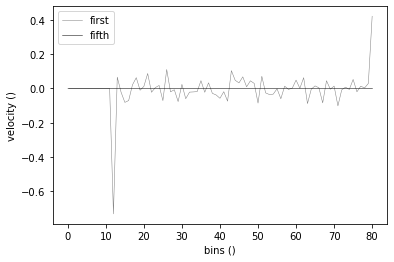

In [102]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\velocity_profile.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

ax=Sheet1.plot(kind='line', y= 0 , color='gray', linewidth=0.5, label='first')

#Sheet1.plot(kind='line', y= 1 , color='blue', linewidth=0.5, label='second', ax=ax)
#ax.legend()
#Sheet1.plot(kind='line',  y= 2, color='red', linewidth=0.5, label='third', ax=ax)
#Sheet1.plot(kind='line',  y= 3, color='green', linewidth=0.5, label='forth', ax=ax)
#Sheet1.plot(kind='line',  y= 4, color='orange', linewidth=0.5, label='forth', ax=ax)
Sheet1.plot(kind='line',  y= 5, color='black', linewidth=0.5, label='fifth', ax=ax)
#Sheet1.plot(kind='line',  y= 6, color='brown', linewidth=0.5, label='sixth', ax=ax)
#Sheet1.plot(kind='line',  y= 7, color='yellow', linewidth=0.5, label='seventh', ax=ax)
#Sheet1.plot(kind='line',  y= 8, color='cyan', linewidth=0.5, label='eigth', ax=ax)
#Sheet1.plot(kind='line',  y= 9, color='pink', linewidth=0.5, label='ninth', ax=ax)
#Sheet1.plot(kind='line',  y= 10, color='purple', linewidth=0.5, label='tenth', ax=ax)

ax.legend()
ax.set_xlabel('bins ()')
ax.set_ylabel('velocity ()') 
pylab.xlim([0,20,1])
pylab.ylim([-0.0001,0.0013])# define the range of y coordinate
#plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
pylab.axhline(0, color='black',linewidth=0.5)#line at y=0
plt.savefig(r'C:\vmd\velocity_profile.png')

# time ave(each frame velocity subtract from first frame)

In [20]:
# difference of Vx of all frames from the first frame
d_Vx=np.zeros ((num_frame+1,num_bin+1))

for i in range (0, 1):#thank GOD! 
    
 for t in range (1, num_frame):
        
    for k in range (1, num_bin+1):
       
        d_Vx[t][k] = Vx_bin_ave_frame[t][k] - Vx_bin_ave_frame[i][k] 
        
        print(i,t,k,d_Vx[t][k])

0 1 1 0.0
0 1 2 0.0
0 1 3 0.0
0 1 4 0.0
0 1 5 -3.9189264308518594e-05
0 1 6 3.453962930873845e-05
0 1 7 -2.2670819571599956e-07
0 1 8 2.396165536194912e-05
0 1 9 -3.577181882652401e-06
0 1 10 1.4125178059579228e-05
0 1 11 3.418498062225283e-05
0 1 12 3.414065120360601e-05
0 1 13 -4.602166894724348e-05
0 1 14 -2.1482564667990204e-05
0 1 15 5.205878337041431e-05
0 1 16 -1.0922958633693187e-06
0 1 17 -1.6529150583722816e-05
0 1 18 2.719538314420254e-05
0 1 19 3.2932222349437023e-06
0 1 20 4.010047658992548e-06
0 1 21 3.918806061460561e-05
0 1 22 5.905007833141157e-06
0 1 23 5.0973061852841596e-05
0 1 24 3.165428374569958e-05
0 1 25 1.4185467406588147e-05
0 1 26 -7.157395359971442e-06
0 1 27 -2.7370287165098972e-05
0 1 28 -7.192649107701666e-06
0 1 29 1.86397929860377e-05
0 1 30 -5.319144088573139e-07
0 1 31 2.1220697248591126e-05
0 1 32 3.679836633555978e-07
0 1 33 -3.2905226761775926e-05
0 1 34 -1.1098878125615382e-05
0 1 35 7.465351738548002e-06
0 1 36 1.7761019455572473e-05
0 1 37 -1.2

0 6 28 6.76426510473522e-05
0 6 29 -3.552309410299454e-05
0 6 30 -5.912298999933579e-05
0 6 31 2.0416295815133957e-05
0 6 32 -1.12168900355211e-05
0 6 33 -3.295035285216719e-05
0 6 34 2.739154493207847e-05
0 6 35 4.29319655301458e-05
0 6 36 2.1381338214015094e-05
0 6 37 -4.0579376051199436e-05
0 6 38 4.362027170801958e-05
0 6 39 -2.9759721516226774e-05
0 6 40 3.247247749788124e-05
0 6 41 -3.248929245861807e-05
0 6 42 -1.2731998434836751e-05
0 6 43 2.1592079787379322e-05
0 6 44 -8.276157117641804e-05
0 6 45 -7.747599858937964e-05
0 6 46 6.278733569720706e-05
0 6 47 4.774280264734503e-06
0 6 48 -1.0450431823686423e-05
0 6 49 4.022021923782099e-05
0 6 50 4.385893648042987e-05
0 6 51 -9.893468855229602e-06
0 6 52 -5.6605322528731144e-05
0 6 53 -1.7598724691568524e-05
0 6 54 -2.0945069146383623e-05
0 6 55 -5.641199899993506e-06
0 6 56 5.486624777992789e-05
0 6 57 -1.5599650911961531e-06
0 6 58 -2.5217594356950036e-05
0 6 59 -1.741364618153194e-05
0 6 60 2.3245027266992065e-05
0 6 61 2.97280

In [21]:
#ave of velovcity of several frames. thankGOD!
Vx_ave=np.zeros ((num_frame+1,num_bin+1))

frame_counter=0
for i in range (0, num_frame):
    frame_counter+=1
    
    for k in range (1, num_bin+1):
        #thankGOD!  
            
       Vx_ave[frame_counter][k]= d_Vx[frame_counter][k]/frame_counter
       print(i,frame_counter, d_Vx[frame_counter][k],Vx_ave[frame_counter][k]) 

0 1 0.0 0.0
0 1 0.0 0.0
0 1 0.0 0.0
0 1 0.0 0.0
0 1 -3.9189264308518594e-05 -3.9189264308518594e-05
0 1 3.453962930873845e-05 3.453962930873845e-05
0 1 -2.2670819571599956e-07 -2.2670819571599956e-07
0 1 2.396165536194912e-05 2.396165536194912e-05
0 1 -3.577181882652401e-06 -3.577181882652401e-06
0 1 1.4125178059579228e-05 1.4125178059579228e-05
0 1 3.418498062225283e-05 3.418498062225283e-05
0 1 3.414065120360601e-05 3.414065120360601e-05
0 1 -4.602166894724348e-05 -4.602166894724348e-05
0 1 -2.1482564667990204e-05 -2.1482564667990204e-05
0 1 5.205878337041431e-05 5.205878337041431e-05
0 1 -1.0922958633693187e-06 -1.0922958633693187e-06
0 1 -1.6529150583722816e-05 -1.6529150583722816e-05
0 1 2.719538314420254e-05 2.719538314420254e-05
0 1 3.2932222349437023e-06 3.2932222349437023e-06
0 1 4.010047658992548e-06 4.010047658992548e-06
0 1 3.918806061460561e-05 3.918806061460561e-05
0 1 5.905007833141157e-06 5.905007833141157e-06
0 1 5.0973061852841596e-05 5.0973061852841596e-05
0 1 3.1654

5 6 -1.935245365263358e-05 -3.2254089421055967e-06
5 6 3.804964609653875e-05 6.341607682756459e-06
5 6 2.529973064615736e-05 4.2166217743595596e-06
5 6 7.053556740490635e-06 1.1755927900817725e-06
5 6 8.477140169180505e-05 1.4128566948634176e-05
5 6 3.663482892496415e-05 6.105804820827359e-06
5 6 5.76993961757054e-06 9.616566029284232e-07
5 6 2.7703788983025453e-05 4.617298163837576e-06
5 6 4.0664535855412616e-05 6.777422642568769e-06
5 6 6.94727408397452e-05 1.1578790139957533e-05
5 6 -2.8396429891147376e-05 -4.732738315191229e-06
5 6 6.76426510473522e-05 1.1273775174558702e-05
5 6 -3.552309410299454e-05 -5.920515683832423e-06
5 6 -5.912298999933579e-05 -9.853831666555966e-06
5 6 2.0416295815133957e-05 3.402715969188993e-06
5 6 -1.12168900355211e-05 -1.86948167258685e-06
5 6 -3.295035285216719e-05 -5.491725475361198e-06
5 6 2.739154493207847e-05 4.565257488679745e-06
5 6 4.29319655301458e-05 7.155327588357633e-06
5 6 2.1381338214015094e-05 3.5635563690025158e-06
5 6 -4.057937605119943

In [22]:
#df = pd.DataFrame(Vx_bin_ave_frame) #to have velocity of each frame
#df.T.to_excel(r'C:\vmd\velocity_profile.xlsx')

df = pd.DataFrame(Vx_ave)#to have ave of velocity of all frames 
df.T.to_excel(r'C:\vmd\velocity_profile_ave.xlsx')
    

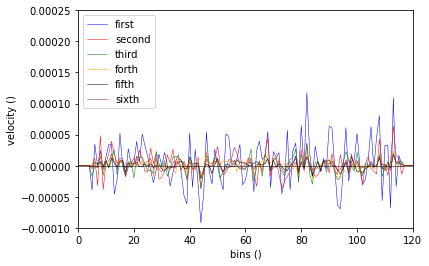

In [23]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\velocity_profile_ave.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

#ax=Sheet1.plot(kind='line', y= 0 , color='blue', linewidth=0.5, label='ave')

ax=Sheet1.plot(kind='line', y= 1 , color='blue', linewidth=0.5, label='first')
#ax.legend()
Sheet1.plot(kind='line',  y= 2, color='red', linewidth=0.5, label='second', ax=ax)
Sheet1.plot(kind='line',  y= 3, color='green', linewidth=0.5, label='third', ax=ax)
Sheet1.plot(kind='line',  y= 4, color='orange', linewidth=0.5, label='forth', ax=ax)
Sheet1.plot(kind='line',  y= 5, color='black', linewidth=0.5, label='fifth', ax=ax)
Sheet1.plot(kind='line',  y= 6, color='brown', linewidth=0.5, label='sixth', ax=ax)
ax.legend()
ax.set_xlabel('bins ()')
ax.set_ylabel('velocity ()') 
pylab.xlim([0,120])
pylab.ylim([-0.0001,0.00025])# define the range of y coordinate
#plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
pylab.axhline(0, color='black',linewidth=0.5)#line at y=0
plt.savefig(r'C:\vmd\velocity_profile7.png')

# average of several frames

In [24]:
#ave window 3
#overall velocity of beads in all frames. we use frame_counter bc so we can not devide by i which is 0 at the beginning

v_overall_bins=np.zeros ((num_bin+1)) #is the totall for all frames
v_overall_bins_frames=np.zeros ((num_frame+1,num_bin+1))

frame_counter=0
for i in range (0, num_frame):
    frame_counter+=1
    j=frame_counter-3  #ave window 3

    for k in range (1, num_bin+1):
        
       
    
       if j < 1:
           v_overall_bins[k] += Vx_bin_ave_frame[frame_counter][k]
           
           v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/frame_counter #overall velocity of beads in all frames
           #print(i,k,frame_counter, v_overall_bins[k], v_overall_bins_frames[frame_counter][k])
           
       else:
           v_overall_bins[k] = Vx_bin_ave_frame[j+1][k]+Vx_bin_ave_frame[j+2][k]+Vx_bin_ave_frame[j+3][k] #it is like time/ave window 3 of lammps 
           v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/3
    
    
        #thankGOD!  
            
       
       
       print(i,k,frame_counter, v_overall_bins[k], v_overall_bins_frames[frame_counter][k])

0 1 1 0.0 0.0
0 2 1 0.0 0.0
0 3 1 0.0 0.0
0 4 1 0.0 0.0
0 5 1 -1.0252513322104052e-05 -1.0252513322104052e-05
0 6 1 1.1403265846584618e-05 1.1403265846584618e-05
0 7 1 1.0391626173584905e-05 1.0391626173584905e-05
0 8 1 -2.266457333733491e-05 -2.266457333733491e-05
0 9 1 -5.742280262934097e-06 -5.742280262934097e-06
0 10 1 8.237832677966115e-06 8.237832677966115e-06
0 11 1 1.7749559197431804e-05 1.7749559197431804e-05
0 12 1 -2.7825684793814457e-05 -2.7825684793814457e-05
0 13 1 -7.225685245827013e-05 -7.225685245827013e-05
0 14 1 -1.3488179098360586e-05 -1.3488179098360586e-05
0 15 1 1.0638517325581389e-05 1.0638517325581389e-05
0 16 1 -2.1749318496835443e-05 -2.1749318496835443e-05
0 17 1 1.1526008753532143e-05 1.1526008753532143e-05
0 18 1 1.0337581970858897e-05 1.0337581970858897e-05
0 19 1 1.461403338533695e-07 1.461403338533695e-07
0 20 1 1.3187041352201441e-06 1.3187041352201441e-06
0 21 1 2.610443535523299e-05 2.610443535523299e-05
0 22 1 -1.667568684782609e-05 -1.6675686847826

3 107 4 -2.8085075672896727e-05 -9.361691890965576e-06
3 108 4 2.4322306713893953e-05 8.107435571297984e-06
3 109 4 2.9067369440029216e-05 9.689123146676406e-06
3 110 4 -5.427490047936344e-05 -1.8091633493121147e-05
3 111 4 -4.5125106823289424e-05 -1.5041702274429807e-05
3 112 4 6.242898504114074e-05 2.0809661680380247e-05
3 113 4 5.725983222624763e-06 1.9086610742082546e-06
3 114 4 1.9466069257961785e-05 6.488689752653928e-06
3 115 4 1.0238415199891477e-05 3.4128050666304925e-06
3 116 4 2.172781830815928e-05 7.2426061027197606e-06
3 117 4 0.0 0.0
3 118 4 0.0 0.0
3 119 4 0.0 0.0
3 120 4 0.0 0.0
4 1 5 0.0 0.0
4 2 5 0.0 0.0
4 3 5 0.0 0.0
4 4 5 0.0 0.0
4 5 5 8.152028927542723e-06 2.7173429758475746e-06
4 6 5 -1.5998902258317167e-05 -5.332967419439055e-06
4 7 5 2.7212954759715424e-05 9.070984919905141e-06
4 8 5 -1.762325674919262e-05 -5.87441891639754e-06
4 9 5 -6.207041264251539e-05 -2.069013754750513e-05
4 10 5 7.026145271567545e-05 2.3420484238558485e-05
4 11 5 -6.977504704659975e-05 -2

In [27]:
#ave window 5

v_overall_bins=np.zeros ((num_bin+1)) #is the totall for all frames
v_overall_bins_frames=np.zeros ((num_frame+1,num_bin+1))

frame_counter=0
for i in range (0, num_frame):
    frame_counter+=1
    j=frame_counter-5  #ave window 5

    for k in range (1, num_bin+1):
        
       
    
       if j < 1:
           v_overall_bins[k] += Vx_bin_ave_frame[frame_counter][k]
           
           v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/frame_counter #overall velocity of beads in all frames
           #print(i,k,frame_counter, v_overall_bins[k], v_overall_bins_frames[frame_counter][k])
           
       else:
           v_overall_bins[k] = Vx_bin_ave_frame[j+1][k]+Vx_bin_ave_frame[j+2][k]+Vx_bin_ave_frame[j+3][k]+Vx_bin_ave_frame[j+4][k]+Vx_bin_ave_frame[j+5][k] #it is like time/ave window 3 of lammps 
           v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/5
    
    
        #thankGOD!  
            
       
       
       print(i,k,frame_counter, v_overall_bins[k], v_overall_bins_frames[frame_counter][k])

0 1 1 0.0 0.0
0 2 1 0.0 0.0
0 3 1 0.0 0.0
0 4 1 0.0 0.0
0 5 1 -1.0252513322104052e-05 -1.0252513322104052e-05
0 6 1 1.1403265846584618e-05 1.1403265846584618e-05
0 7 1 1.0391626173584905e-05 1.0391626173584905e-05
0 8 1 -2.266457333733491e-05 -2.266457333733491e-05
0 9 1 -5.742280262934097e-06 -5.742280262934097e-06
0 10 1 8.237832677966115e-06 8.237832677966115e-06
0 11 1 1.7749559197431804e-05 1.7749559197431804e-05
0 12 1 -2.7825684793814457e-05 -2.7825684793814457e-05
0 13 1 -7.225685245827013e-05 -7.225685245827013e-05
0 14 1 -1.3488179098360586e-05 -1.3488179098360586e-05
0 15 1 1.0638517325581389e-05 1.0638517325581389e-05
0 16 1 -2.1749318496835443e-05 -2.1749318496835443e-05
0 17 1 1.1526008753532143e-05 1.1526008753532143e-05
0 18 1 1.0337581970858897e-05 1.0337581970858897e-05
0 19 1 1.461403338533695e-07 1.461403338533695e-07
0 20 1 1.3187041352201441e-06 1.3187041352201441e-06
0 21 1 2.610443535523299e-05 2.610443535523299e-05
0 22 1 -1.667568684782609e-05 -1.6675686847826

4 25 5 -0.00011805249480454199 -2.3610498960908397e-05
4 26 5 -6.285353467651226e-05 -1.2570706935302452e-05
4 27 5 6.456964559875212e-05 1.2913929119750424e-05
4 28 5 2.5463171496737726e-05 5.092634299347545e-06
4 29 5 -1.429834085657027e-05 -2.859668171314054e-06
4 30 5 3.2630730519231564e-05 6.526146103846313e-06
4 31 5 7.250532213492615e-05 1.450106442698523e-05
4 32 5 -4.043258447741286e-05 -8.086516895482573e-06
4 33 5 -3.170159661348404e-06 -6.340319322696808e-07
4 34 5 1.3730459846395966e-05 2.7460919692791933e-06
4 35 5 -9.260465996882743e-05 -1.8520931993765487e-05
4 36 5 2.486314611296681e-06 4.972629222593361e-07
4 37 5 -1.613085549769338e-05 -3.226171099538676e-06
4 38 5 2.03955880145442e-05 4.079117602908841e-06
4 39 5 -4.907858003849007e-05 -9.815716007698014e-06
4 40 5 2.8848008580647978e-05 5.769601716129596e-06
4 41 5 6.167335098993505e-05 1.233467019798701e-05
4 42 5 6.0797600291648465e-06 1.2159520058329694e-06
4 43 5 3.0215926539247684e-05 6.043185307849537e-06
4 4

In [73]:
#ave window 7

v_overall_bins=np.zeros ((num_bin+1)) #is the totall for all frames
v_overall_bins_frames=np.zeros ((num_frame+1,num_bin+1))

frame_counter=0
for i in range (0, num_frame):
    frame_counter+=1
    j=frame_counter-7  #ave window 7

    for k in range (1, num_bin+1):
        
       
    
       if j < 1:
           v_overall_bins[k] += Vx_bin_ave_frame[frame_counter][k]
           
           v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/frame_counter #overall velocity of beads in all frames
           #print(i,k,frame_counter, v_overall_bins[k], v_overall_bins_frames[frame_counter][k])
           
       else:
           v_overall_bins[k] = Vx_bin_ave_frame[j+1][k]+Vx_bin_ave_frame[j+2][k]+Vx_bin_ave_frame[j+3][k]+Vx_bin_ave_frame[j+4][k]+Vx_bin_ave_frame[j+5][k]+Vx_bin_ave_frame[j+6][k]+Vx_bin_ave_frame[j+7][k] 
           v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/7
    
    
        #thankGOD!  
            
       
       
       print(i,k,frame_counter, v_overall_bins[k], v_overall_bins_frames[frame_counter][k])

0 1 1 0.0 0.0
0 2 1 0.0 0.0
0 3 1 0.0 0.0
0 4 1 0.0 0.0
0 5 1 -2.186442880248081e-05 -2.186442880248081e-05
0 6 1 4.450260867565888e-06 4.450260867565888e-06
0 7 1 8.588971281264443e-05 8.588971281264443e-05
0 8 1 8.102266042759417e-05 8.102266042759417e-05
0 9 1 0.00015299877116714064 0.00015299877116714064
0 10 1 0.00023835236156915629 0.00023835236156915629
0 11 1 0.00022405040341486805 0.00022405040341486805
0 12 1 0.00022522904809278314 0.00022522904809278314
0 13 1 0.0002749296793325567 0.0002749296793325567
0 14 1 0.0003079416913281135 0.0003079416913281135
0 15 1 0.0003798848485300081 0.0003798848485300081
0 16 1 0.0003190513145184886 0.0003190513145184886
0 17 1 0.0003505916115418909 0.0003505916115418909
0 18 1 0.00039493547041962915 0.00039493547041962915
0 19 1 0.00045302310617439105 0.00045302310617439105
0 20 1 0.00048398271150352373 0.00048398271150352373
0 21 1 0.00048410926591705436 0.00048410926591705436
0 22 1 0.0005052341477171412 0.0005052341477171412
0 23 1 0.0005

5 87 6 0.0024821037998058668 0.00041368396663431115
5 88 6 0.0024299230291633576 0.0004049871715272263
5 89 6 0.0025186531088198234 0.0004197755181366372
5 90 6 0.0023815671851457726 0.0003969278641909621
5 91 6 0.002290491067965044 0.00038174851132750736
5 92 6 0.002260946987708764 0.00037682449795146066
5 93 6 0.002273780165049485 0.0003789633608415808
5 94 6 0.0022501319947501623 0.00037502199912502703
5 95 6 0.002258793143701068 0.000376465523950178
5 96 6 0.0022440598830486915 0.00037400998050811526
5 97 6 0.002111017393689457 0.0003518362322815762
5 98 6 0.0021418493392292353 0.0003569748898715392
5 99 6 0.0020104876865631696 0.0003350812810938616
5 100 6 0.002165733394304322 0.000360955565717387
5 101 6 0.001836729388772027 0.00030612156479533785
5 102 6 0.0018662146265861098 0.000311035771097685
5 103 6 0.001904584783745153 0.0003174307972908588
5 104 6 0.0018246716043913405 0.0003041119340652234
5 105 6 0.0018739426361708477 0.0003123237726951413
5 106 6 0.0017461126213899098 

10 55 11 0.0013494942963965771 0.0001927848994852253
10 56 11 0.0013612189879343888 0.0001944598554191984
10 57 11 0.0013444653833232947 0.00019206648333189926
10 58 11 0.001291457709544038 0.00018449395850629117
10 59 11 0.0013482539320134287 0.00019260770457334695
10 60 11 0.0012396956235966774 0.00017709937479952535
10 61 11 0.0013102980035874486 0.00018718542908392123
10 62 11 0.0012444801516939715 0.00017778287881342448
10 63 11 0.001285252472319151 0.000183607496045593
10 64 11 0.0012513804432862535 0.00017876863475517908
10 65 11 0.0013157557130785234 0.0001879651018683605
10 66 11 0.0012394609881408688 0.00017706585544869554
10 67 11 0.001250352768705653 0.0001786218241008076
10 68 11 0.001279330600936187 0.00018276151441945528
10 69 11 0.0011923604866011218 0.00017033721237158883
10 70 11 0.0012716400304930056 0.0001816628614990008
10 71 11 0.0012376739761930029 0.00017681056802757185
10 72 11 0.001299034822830158 0.00018557640326145116
10 73 11 0.001309912069649024 0.00018713

In [22]:
#ave window 10

v_overall_bins=np.zeros ((num_bin+1)) #is the totall for all frames
v_overall_bins_frames=np.zeros ((num_frame+1,num_bin+1))

frame_counter=0
for i in range (0, num_frame):
    frame_counter+=1
    j=frame_counter-10  #ave window 10

    for k in range (1, num_bin+1):
        
       
    
       if j < 1:
           v_overall_bins[k] += Vx_bin_ave_frame[frame_counter][k]
           
           v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/frame_counter #overall velocity of beads in all frames
           #print(i,k,frame_counter, v_overall_bins[k], v_overall_bins_frames[frame_counter][k])
           
       else:
           v_overall_bins[k] = Vx_bin_ave_frame[j+1][k]+Vx_bin_ave_frame[j+2][k]+Vx_bin_ave_frame[j+3][k]+Vx_bin_ave_frame[j+4][k]+Vx_bin_ave_frame[j+5][k]+Vx_bin_ave_frame[j+6][k]+Vx_bin_ave_frame[j+7][k]+Vx_bin_ave_frame[j+8][k]+Vx_bin_ave_frame[j+9][k]+Vx_bin_ave_frame[j+10][k] 
           v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/10
    
    
        #thankGOD!  
            
       
       
       print(i,k,frame_counter, v_overall_bins[k], v_overall_bins_frames[frame_counter][k])

0 1 1 0.0 0.0
0 2 1 0.0 0.0
0 3 1 -0.7308896666666667 -0.7308896666666667
0 4 1 0.19865648458594293 0.19865648458594293
0 5 1 0.3295143901382775 0.3295143901382775
0 6 1 0.4794200070025503 0.4794200070025503
0 7 1 0.5247433068294485 0.5247433068294485
0 8 1 0.5595298848790934 0.5595298848790934
0 9 1 0.644437573294193 0.644437573294193
0 10 1 0.6342100662060648 0.6342100662060648
0 11 1 0.6220594399032875 0.6220594399032875
0 12 1 0.6571925912012584 0.6571925912012584
0 13 1 0.6694972305923651 0.6694972305923651
0 14 1 0.6586513359279847 0.6586513359279847
0 15 1 0.5820210411940768 0.5820210411940768
0 16 1 0.6044877444859459 0.6044877444859459
0 17 1 0.5342539429096077 0.5342539429096077
0 18 1 0.4453224543923808 0.4453224543923808
0 19 1 0.2834764189528006 0.2834764189528006
0 20 1 0.11641101224957551 0.11641101224957551
1 1 2 0.0 0.0
1 2 2 0.0 0.0
1 3 2 -0.6287105916666667 -0.3143552958333333
1 4 2 0.35179998947358326 0.17589999473679163
1 5 2 0.6558808746738778 0.3279404373369389
1

In [23]:
#df = pd.DataFrame(Vx_bin_ave_frame) #to have velocity of each frame
#df.T.to_excel(r'C:\vmd\velocity_profile.xlsx')

df = pd.DataFrame(v_overall_bins_frames)#to have ave of velocity of all frames 
df.T.to_excel(r'C:\vmd\velocity_profile_ave_frames.xlsx')

KeyError: 7

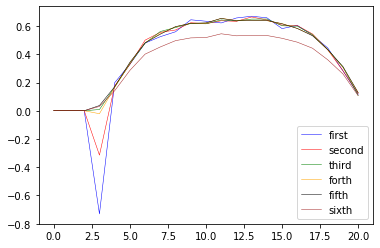

In [24]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\velocity_profile_ave_frames.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

#ax=Sheet1.plot(kind='line', y= 0 , color='blue', linewidth=0.5, label='ave')

ax=Sheet1.plot(kind='line', y= 1 , color='blue', linewidth=0.5, label='first')
#ax.legend()
Sheet1.plot(kind='line',  y= 2, color='red', linewidth=0.5, label='second', ax=ax)
Sheet1.plot(kind='line',  y= 3, color='green', linewidth=0.5, label='third', ax=ax)
Sheet1.plot(kind='line',  y= 4, color='orange', linewidth=0.5, label='forth', ax=ax)
Sheet1.plot(kind='line',  y= 5, color='black', linewidth=0.5, label='fifth', ax=ax)
Sheet1.plot(kind='line',  y= 6, color='brown', linewidth=0.5, label='sixth', ax=ax)
Sheet1.plot(kind='line',  y= 7, color='yellow', linewidth=0.5, label='seventh', ax=ax)
Sheet1.plot(kind='line',  y= 8, color='cyan', linewidth=0.5, label='eigth', ax=ax)
Sheet1.plot(kind='line',  y= 9, color='pink', linewidth=0.5, label='ninth', ax=ax)
Sheet1.plot(kind='line',  y= 10, color='purple', linewidth=0.5, label='tenth', ax=ax)
ax.legend()
ax.set_xlabel('bins ()')
ax.set_ylabel('velocity ()') 
pylab.xlim([0,120])
pylab.ylim([-0.0001,0.0013])# define the range of y coordinate
#plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
pylab.axhline(0, color='black',linewidth=0.5)#line at y=0
plt.savefig(r'C:\vmd\velocity_profile_ave_frames7.png')

# ave all frames

In [37]:
#ave window 7

v_overall_bins=np.zeros ((num_bin+1)) #is the totall for all frames
v_overall_bins_frames=np.zeros ((num_frame+1,num_bin+1))

frame_counter=0
for i in range (0, num_frame):
    frame_counter+=1
    j=frame_counter-7  #ave window 7

    for k in range (1, num_bin+1):
        
       
    
       #if j < 1:
           v_overall_bins[k] += Vx_bin_ave_frame[frame_counter][k]
           
           v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/frame_counter #overall velocity of beads in all frames
           #v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/1
        #print(i,k,frame_counter, v_overall_bins[k], v_overall_bins_frames[frame_counter][k])
           
       #else:
           #v_overall_bins[k] = Vx_bin_ave_frame[j+1][k]+Vx_bin_ave_frame[j+2][k]+Vx_bin_ave_frame[j+3][k]+Vx_bin_ave_frame[j+4][k]+Vx_bin_ave_frame[j+5][k]+Vx_bin_ave_frame[j+6][k]+Vx_bin_ave_frame[j+7][k] 
           #v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/7
    
    
        #thankGOD!  
            
       
       
           print(i,k,frame_counter, v_overall_bins[k], v_overall_bins_frames[frame_counter][k])

0 1 1 0.0 0.0
0 2 1 0.0 0.0
0 3 1 0.0 0.0
0 4 1 0.0 0.0
0 5 1 -1.0252513322104052e-05 -1.0252513322104052e-05
0 6 1 1.1403265846584618e-05 1.1403265846584618e-05
0 7 1 1.0391626173584905e-05 1.0391626173584905e-05
0 8 1 -2.266457333733491e-05 -2.266457333733491e-05
0 9 1 -5.742280262934097e-06 -5.742280262934097e-06
0 10 1 8.237832677966115e-06 8.237832677966115e-06
0 11 1 1.7749559197431804e-05 1.7749559197431804e-05
0 12 1 -2.7825684793814457e-05 -2.7825684793814457e-05
0 13 1 -7.225685245827013e-05 -7.225685245827013e-05
0 14 1 -1.3488179098360586e-05 -1.3488179098360586e-05
0 15 1 1.0638517325581389e-05 1.0638517325581389e-05
0 16 1 -2.1749318496835443e-05 -2.1749318496835443e-05
0 17 1 1.1526008753532143e-05 1.1526008753532143e-05
0 18 1 1.0337581970858897e-05 1.0337581970858897e-05
0 19 1 1.461403338533695e-07 1.461403338533695e-07
0 20 1 1.3187041352201441e-06 1.3187041352201441e-06
0 21 1 2.610443535523299e-05 2.610443535523299e-05
0 22 1 -1.667568684782609e-05 -1.6675686847826

4 91 5 3.0269545088631483e-06 6.053909017726297e-07
4 92 5 -0.00015781765365412666 -3.156353073082533e-05
4 93 5 2.860864239585598e-05 5.721728479171196e-06
4 94 5 -2.2563469359992367e-05 -4.5126938719984734e-06
4 95 5 -6.563394809950013e-05 -1.3126789619900025e-05
4 96 5 4.5300020525149665e-06 9.060004105029932e-07
4 97 5 -0.00013401410872963845 -2.680282174592769e-05
4 98 5 1.8506965657675054e-05 3.701393131535011e-06
4 99 5 -3.1301547360119676e-05 -6.260309472023935e-06
4 100 5 0.00010654408092190815 2.130881618438163e-05
4 101 5 -1.3567550127986297e-05 -2.7135100255972596e-06
4 102 5 -3.5963117071673042e-06 -7.192623414334609e-07
4 103 5 -0.00010281633734033843 -2.0563267468067686e-05
4 104 5 6.23106308690986e-05 1.2462126173819719e-05
4 105 5 1.8606364839412605e-05 3.7212729678825212e-06
4 106 5 -7.209121053639151e-05 -1.4418242107278304e-05
4 107 5 2.2944672612167896e-05 4.588934522433579e-06
4 108 5 5.110373343409283e-05 1.0220746686818567e-05
4 109 5 1.5792229866086256e-05 3.15

In [76]:
#ave window 10

v_overall_bins=np.zeros ((num_bin+1)) #is the totall for all frames
v_overall_bins_frames=np.zeros ((num_frame+1,num_bin+1))

frame_counter=0
for i in range (0, num_frame):
    frame_counter+=1
    j=frame_counter-10  #ave window 10

    for k in range (1, num_bin+1):
        
       
    
       #if j < 1:
           v_overall_bins[k] += Vx_bin_ave_frame[frame_counter][k]
           
           v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/frame_counter #overall velocity of beads in all frames
           #v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/1
        #print(i,k,frame_counter, v_overall_bins[k], v_overall_bins_frames[frame_counter][k])
           
       #else:
           #v_overall_bins[k] = Vx_bin_ave_frame[j+1][k]+Vx_bin_ave_frame[j+2][k]+Vx_bin_ave_frame[j+3][k]+Vx_bin_ave_frame[j+4][k]+Vx_bin_ave_frame[j+5][k]+Vx_bin_ave_frame[j+6][k]+Vx_bin_ave_frame[j+7][k] 
           #v_overall_bins_frames[frame_counter][k] = v_overall_bins[k]/7
    
    
        #thankGOD!  
            
       
       
           print(i,k,frame_counter, v_overall_bins[k], v_overall_bins_frames[frame_counter][k])

0 1 1 0.0 0.0
0 2 1 0.0 0.0
0 3 1 0.0 0.0
0 4 1 0.0 0.0
0 5 1 -2.186442880248081e-05 -2.186442880248081e-05
0 6 1 4.450260867565888e-06 4.450260867565888e-06
0 7 1 8.588971281264443e-05 8.588971281264443e-05
0 8 1 8.102266042759417e-05 8.102266042759417e-05
0 9 1 0.00015299877116714064 0.00015299877116714064
0 10 1 0.00023835236156915629 0.00023835236156915629
0 11 1 0.00022405040341486805 0.00022405040341486805
0 12 1 0.00022522904809278314 0.00022522904809278314
0 13 1 0.0002749296793325567 0.0002749296793325567
0 14 1 0.0003079416913281135 0.0003079416913281135
0 15 1 0.0003798848485300081 0.0003798848485300081
0 16 1 0.0003190513145184886 0.0003190513145184886
0 17 1 0.0003505916115418909 0.0003505916115418909
0 18 1 0.00039493547041962915 0.00039493547041962915
0 19 1 0.00045302310617439105 0.00045302310617439105
0 20 1 0.00048398271150352373 0.00048398271150352373
0 21 1 0.00048410926591705436 0.00048410926591705436
0 22 1 0.0005052341477171412 0.0005052341477171412
0 23 1 0.0005

3 103 4 0.0014231296158913429 0.0003557824039728357
3 104 4 0.0013858504681416584 0.0003464626170354146
3 105 4 0.0014487679485367699 0.00036219198713419246
3 106 4 0.0012839986890142555 0.0003209996722535639
3 107 4 0.001090204926560847 0.00027255123164021173
3 108 4 0.0010191098559895074 0.00025477746399737685
3 109 4 0.0010199450846624049 0.0002549862711656012
3 110 4 0.0008789588078841636 0.0002197397019710409
3 111 4 0.0006899086706381061 0.00017247716765952652
3 112 4 0.0006194388114581304 0.0001548597028645326
3 113 4 0.00041541839983515525 0.00010385459995878881
3 114 4 0.0003309619768584294 8.274049421460735e-05
3 115 4 0.0002742329991795223 6.855824979488057e-05
3 116 4 0.00011156617112371287 2.7891542780928216e-05
3 117 4 0.0 0.0
3 118 4 0.0 0.0
3 119 4 0.0 0.0
3 120 4 0.0 0.0
4 1 5 0.0 0.0
4 2 5 0.0 0.0
4 3 5 0.0 0.0
4 4 5 0.0 0.0
4 5 5 -4.722528900019801e-05 -9.445057800039601e-06
4 6 5 4.418014206805372e-05 8.836028413610743e-06
4 7 5 0.00046578963497347607 9.315792699469

8 3 9 0.0 0.0
8 4 9 0.0 0.0
8 5 9 -3.2781727681721456e-06 -3.6424141868579397e-07
8 6 9 0.00010892161802885305 1.2102402003205894e-05
8 7 9 0.0006680225462428708 7.422472736031897e-05
8 8 9 0.0007414799441562101 8.238666046180113e-05
8 9 9 0.0011739815950831045 0.0001304423994536783
8 10 9 0.0015252984861457142 0.00016947760957174602
8 11 9 0.0017556024084939563 0.00019506693427710626
8 12 9 0.0017718666280860244 0.00019687406978733605
8 13 9 0.0018794267336152898 0.0002088251926239211
8 14 9 0.0021132536994444254 0.00023480596660493616
8 15 9 0.00232571283028859 0.0002584125366987322
8 16 9 0.002395210354103421 0.000266134483789269
8 17 9 0.0023744159572885925 0.00026382399525428805
8 18 9 0.002314651908329749 0.00025718354536997213
8 19 9 0.002641736573019088 0.00029352628589100977
8 20 9 0.002747658929078683 0.0003052954365642981
8 21 9 0.002690561670583616 0.0002989512967315129
8 22 9 0.002567868255161371 0.0002853186950179301
8 23 9 0.002715700381190376 0.00030174448679893065
8 24

In [77]:
#df = pd.DataFrame(Vx_bin_ave_frame) #to have velocity of each frame
#df.T.to_excel(r'C:\vmd\velocity_profile.xlsx')

df = pd.DataFrame(v_overall_bins_frames)#to have ave of velocity of all frames 
df.T.to_excel(r'C:\vmd\velocity_profile_ave_frames_all.xlsx')

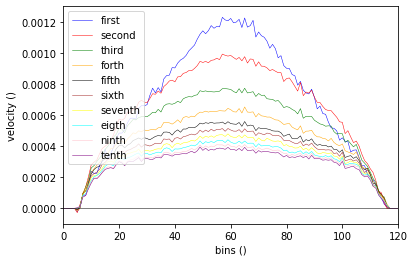

In [80]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pylab 

df =pd.ExcelFile(r'C:\vmd\velocity_profile_ave_frames_all.xlsx')# the name of execl file should start with capital word. Rdf is correct but not rdf 
Sheet1 =pd.read_excel(df,header=0)

#ax=Sheet1.plot(kind='line', y= 0 , color='blue', linewidth=0.5, label='ave')

ax=Sheet1.plot(kind='line', y= 1 , color='blue', linewidth=0.5, label='first')
#ax.legend()
Sheet1.plot(kind='line',  y= 2, color='red', linewidth=0.5, label='second', ax=ax)
Sheet1.plot(kind='line',  y= 3, color='green', linewidth=0.5, label='third', ax=ax)
Sheet1.plot(kind='line',  y= 4, color='orange', linewidth=0.5, label='forth', ax=ax)
Sheet1.plot(kind='line',  y= 5, color='black', linewidth=0.5, label='fifth', ax=ax)
Sheet1.plot(kind='line',  y= 6, color='brown', linewidth=0.5, label='sixth', ax=ax)
Sheet1.plot(kind='line',  y= 7, color='yellow', linewidth=0.5, label='seventh', ax=ax)
Sheet1.plot(kind='line',  y= 8, color='cyan', linewidth=0.5, label='eigth', ax=ax)
Sheet1.plot(kind='line',  y= 9, color='pink', linewidth=0.5, label='ninth', ax=ax)
Sheet1.plot(kind='line',  y= 10, color='purple', linewidth=0.5, label='tenth', ax=ax)
ax.legend()
ax.set_xlabel('bins ()')
ax.set_ylabel('velocity ()') 
pylab.xlim([0,120])
pylab.ylim([-0.0001,0.0013])# define the range of y coordinate
#plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0))#show the x and y axis in scientific mode
pylab.axhline(0, color='black',linewidth=0.5)#line at y=0
plt.savefig(r'C:\vmd\velocity_profile_ave_frames_all.png')